# IMPORTANDO LIBERIAS

In [1]:
# Importación de librerías
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

# CARGA DE DATOS

In [3]:
# Lectura de los datos
df1 = pd.read_csv('../data/credits.csv')
df2 = pd.read_csv('../data/movies_metadata.csv')
df3 = pd.read_csv('../data/keywords.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_21036\3521517731.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../data/movies_metadata.csv')


# ANÁLISIS EXPLORATORIO

In [4]:
df1.head(3)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
df2.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
df3.head(3)

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


# PRE-PROCESAMIENTO DE LOS DATOS

In [10]:
#Verificar que datos de la columna 'id' no son numéricos
print((df2[pd.to_numeric(df2['id'], errors='coerce').isnull()])['id'])

19730    1997-08-20
29503    2012-09-29
35587    2014-01-01
Name: id, dtype: object


In [11]:
# Eliminar las filas que no son numéricas
date_rows = df2[df2['id'].str.match(r'^\d{4}-\d{2}-\d{2}$')]
df2 = df2.drop(date_rows.index)

In [12]:
# Convertir la columna 'id' a tipo numérico
df2['id'] = df2['id'].astype(int)

In [13]:
# Ver los lenguajes originales de las películas
df2['original_language'].value_counts()

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: count, Length: 89, dtype: int64

In [14]:
# Eliminar las filas que no están en inglés
df2 = df2[df2['original_language'] == 'en']
df2.shape

(32269, 24)

In [15]:
# Juntar los tres dataframes
df = df2.merge(df1, on='id')
df = df.merge(df3, on='id')

In [16]:
# Verificar el tamaño del dataframe junto
df.shape

(32937, 27)

In [17]:
df.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

   vote_average  vote_count  \
0           7.7      5415.0   
1           6.9      2413.0   
2           6.5        92.0   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...   

                                            keywords  
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...  
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...  
2  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...  

[3 rows x 27 columns]

In [18]:
# Verificar si hay valores nulos
nan_counts = df.isna().sum().sort_values(ascending=False)
nan_counts

belongs_to_collection    29777
homepage                 26619
tagline                  14741
poster_path                333
status                      72
overview                    72
release_date                68
imdb_id                     13
runtime                      9
production_companies         3
spoken_languages             3
revenue                      3
production_countries         3
title                        3
video                        3
vote_average                 3
vote_count                   3
popularity                   3
cast                         0
crew                         0
adult                        0
original_title               0
original_language            0
id                           0
genres                       0
budget                       0
keywords                     0
dtype: int64

# VISUALIZACIÓN DE LOS DATOS

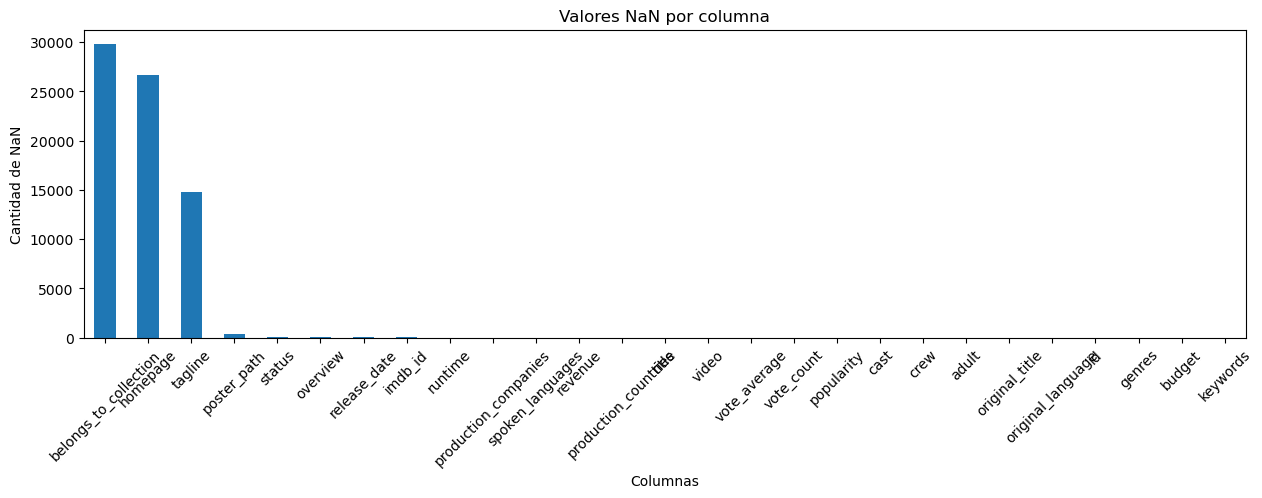

In [19]:
# Calcular y visualizar los valores NaN por columna
nan_counts.plot(kind='bar', figsize=(15, 4))
plt.xlabel('Columnas')
plt.ylabel('Cantidad de NaN')
plt.title('Valores NaN por columna')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Eliminar las columnas con valores nulos y ver el nuevo tamaño del dataframe
df.dropna(subset=['poster_path'], axis=0, inplace = True)
df.shape

(32604, 27)

In [33]:
# Eliminamos las columnas belongs_to_collection y homepage
df.drop(['belongs_to_collection', 'homepage'], axis=1, inplace = True)
df.shape

(32604, 25)

In [34]:
# Verificar si hay valores nulos
print(df.isnull().sum())

adult                       0
budget                      0
genres                      0
id                          0
imdb_id                     9
original_language           0
original_title              0
overview                   62
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date               31
revenue                     0
runtime                     5
spoken_languages            0
status                     62
tagline                 14421
title                       0
video                       0
vote_average                0
vote_count                  0
cast                        0
crew                        0
keywords                    0
dtype: int64


In [35]:
# Obtener el promedio de la columna 'vote_average'
C = df['vote_average'].mean()
C

5.5233161575266845

In [36]:
# Obtener el mínimo de votos requeridos para estar en el top 90%
m = df['vote_count'].quantile(0.9)
m

240.0

In [45]:
# Guardar el dataset limpio
df.to_csv("../data/dataset.csv", index=False)

In [46]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(3264, 25)

In [39]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [47]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [48]:
# Ordena las peliculas basado en el score calculado
q_movies = q_movies.sort_values('score', ascending=False)

# Imprime las peliculas que pertenecen al Top 15
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average     score
280    The Shawshank Redemption      8358.0           8.5  8.416910
734               The Godfather      6024.0           8.5  8.385951
10286           The Dark Knight     12269.0           8.3  8.246726
2558                 Fight Club      9678.0           8.3  8.232809
265                Pulp Fiction      8670.0           8.3  8.225207
482            Schindler's List      4436.0           8.3  8.157484
18309                  Whiplash      4376.0           8.3  8.155632
315                Forrest Gump      8147.0           8.2  8.123405
1037     The Godfather: Part II      3418.0           8.3  8.117823
1019    The Empire Strikes Back      5998.0           8.2  8.097018

In [42]:
palette = sns.color_palette("husl", len(q_movies.head(50)))

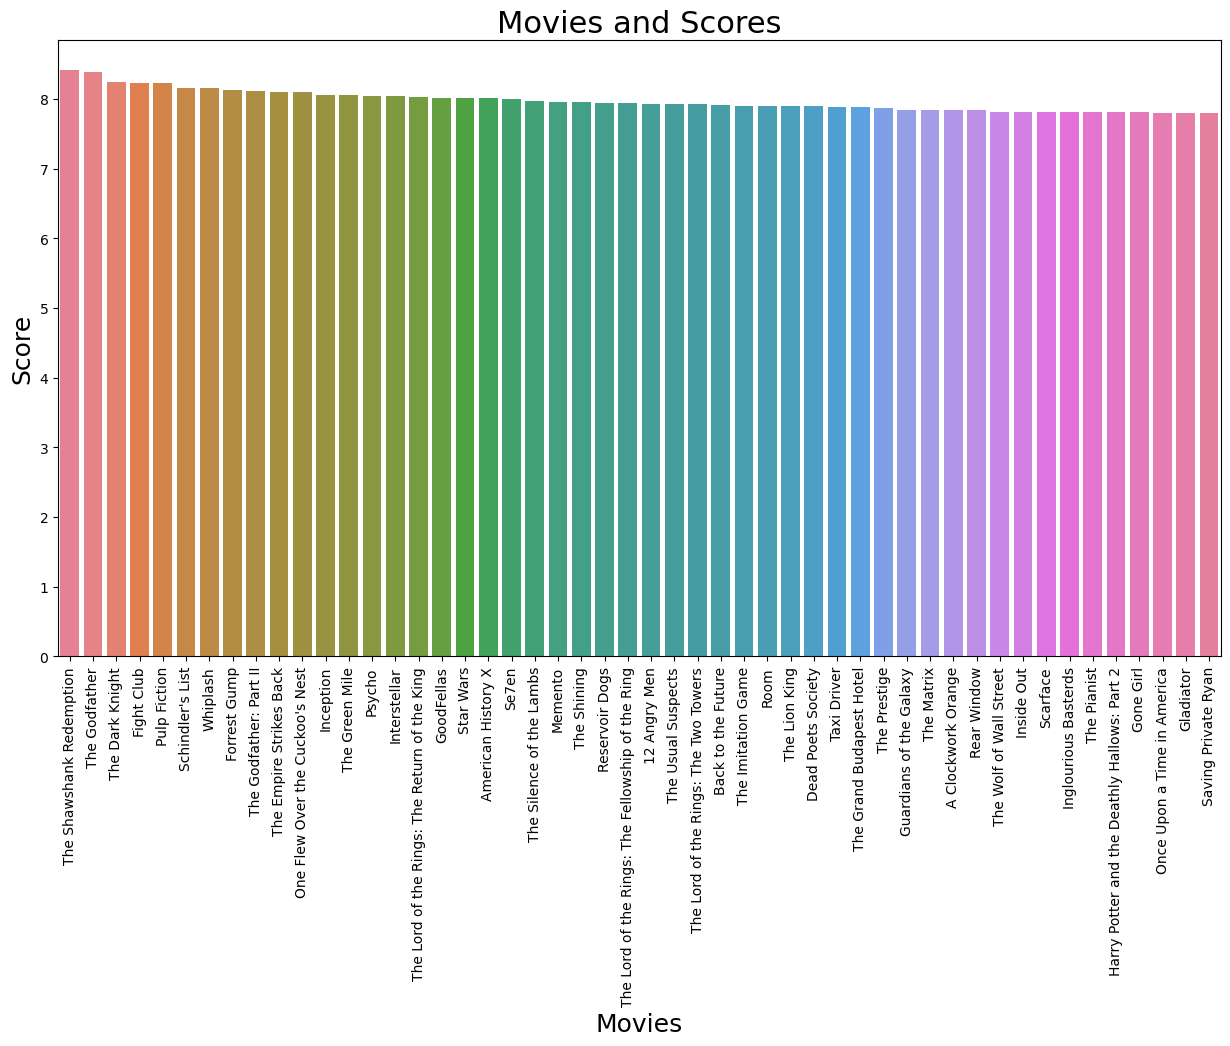

In [43]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g = sns.barplot(x='title', y='score', data=q_movies.head(50), palette=palette)
g.set_title("Movies and Scores", fontsize=22)
g.set_xlabel("Movies", fontsize=18)
g.set_ylabel('Score', fontsize=18)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: pointplot() got an unexpected keyword argument 'legend'

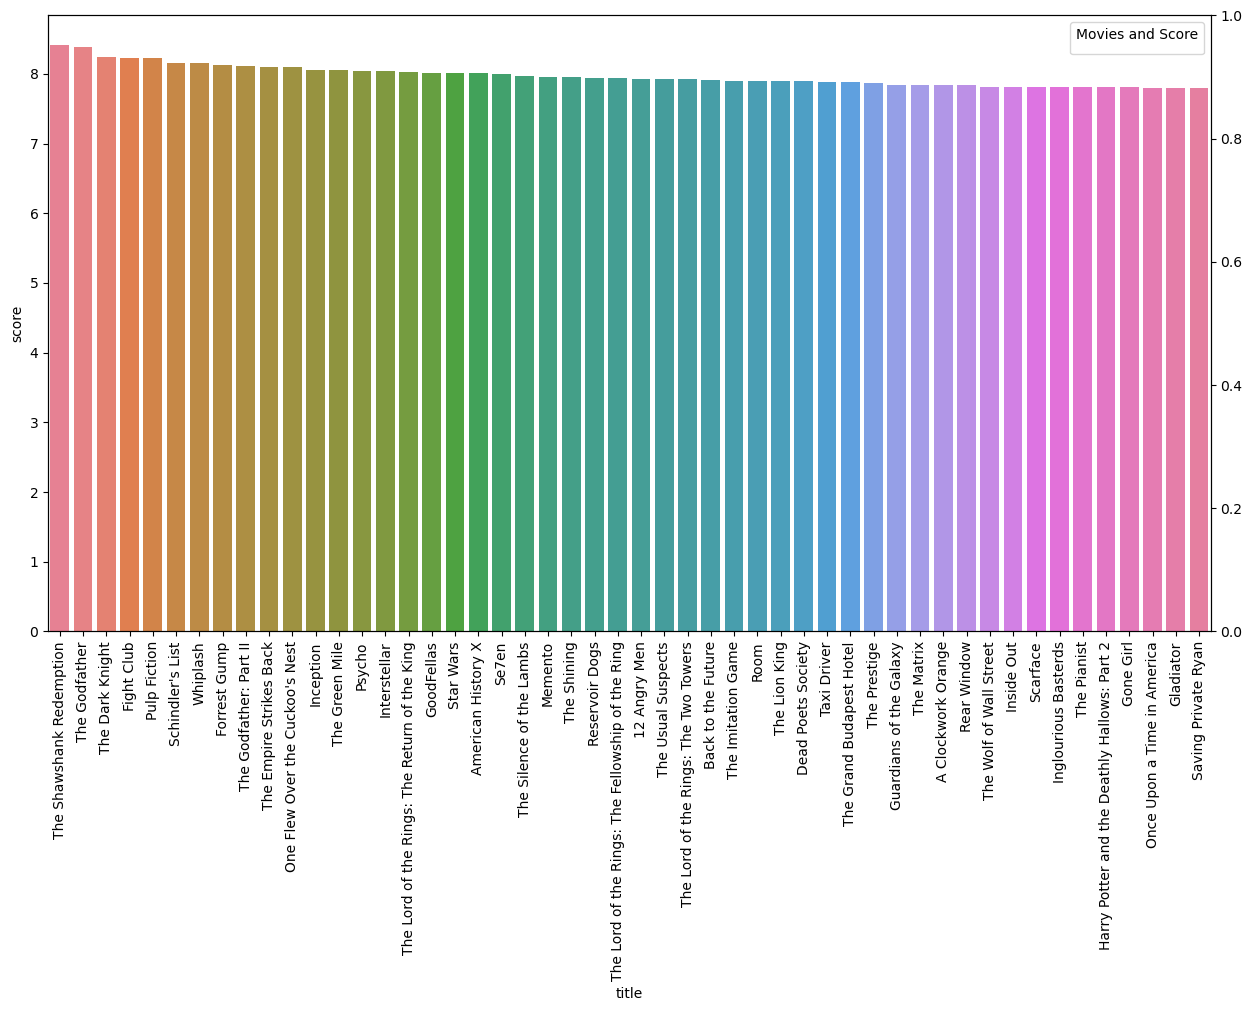

In [44]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y='runtime', data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("runtime", fontsize=17)
g1.set_title("Movie Score Runtime Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element

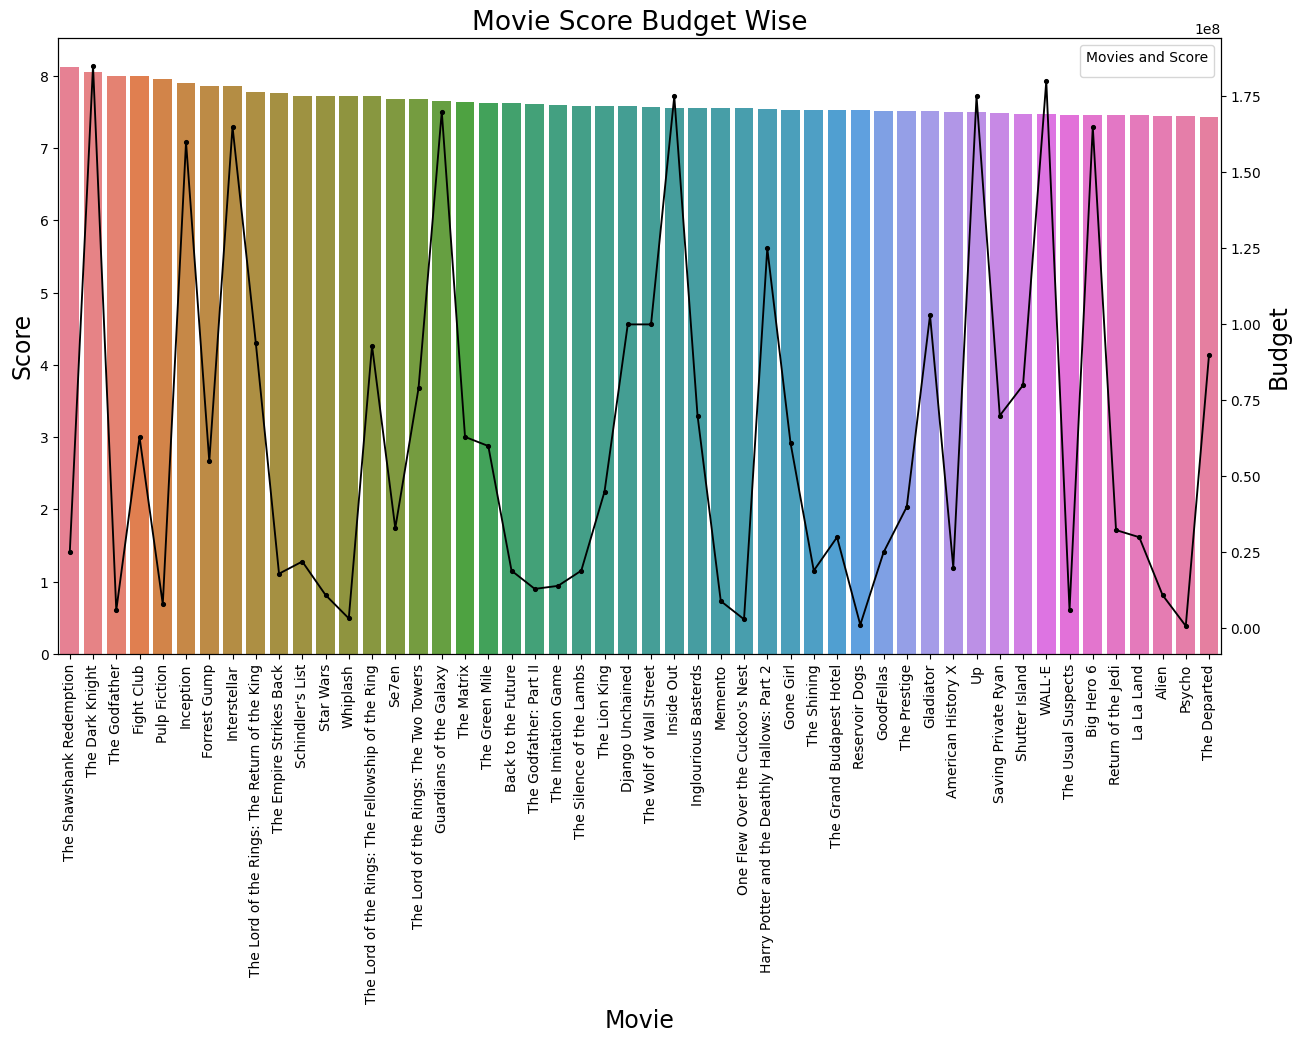

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("Budget", fontsize=17)
g1.set_title("Movie Score Budget Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['revenue'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot elemen

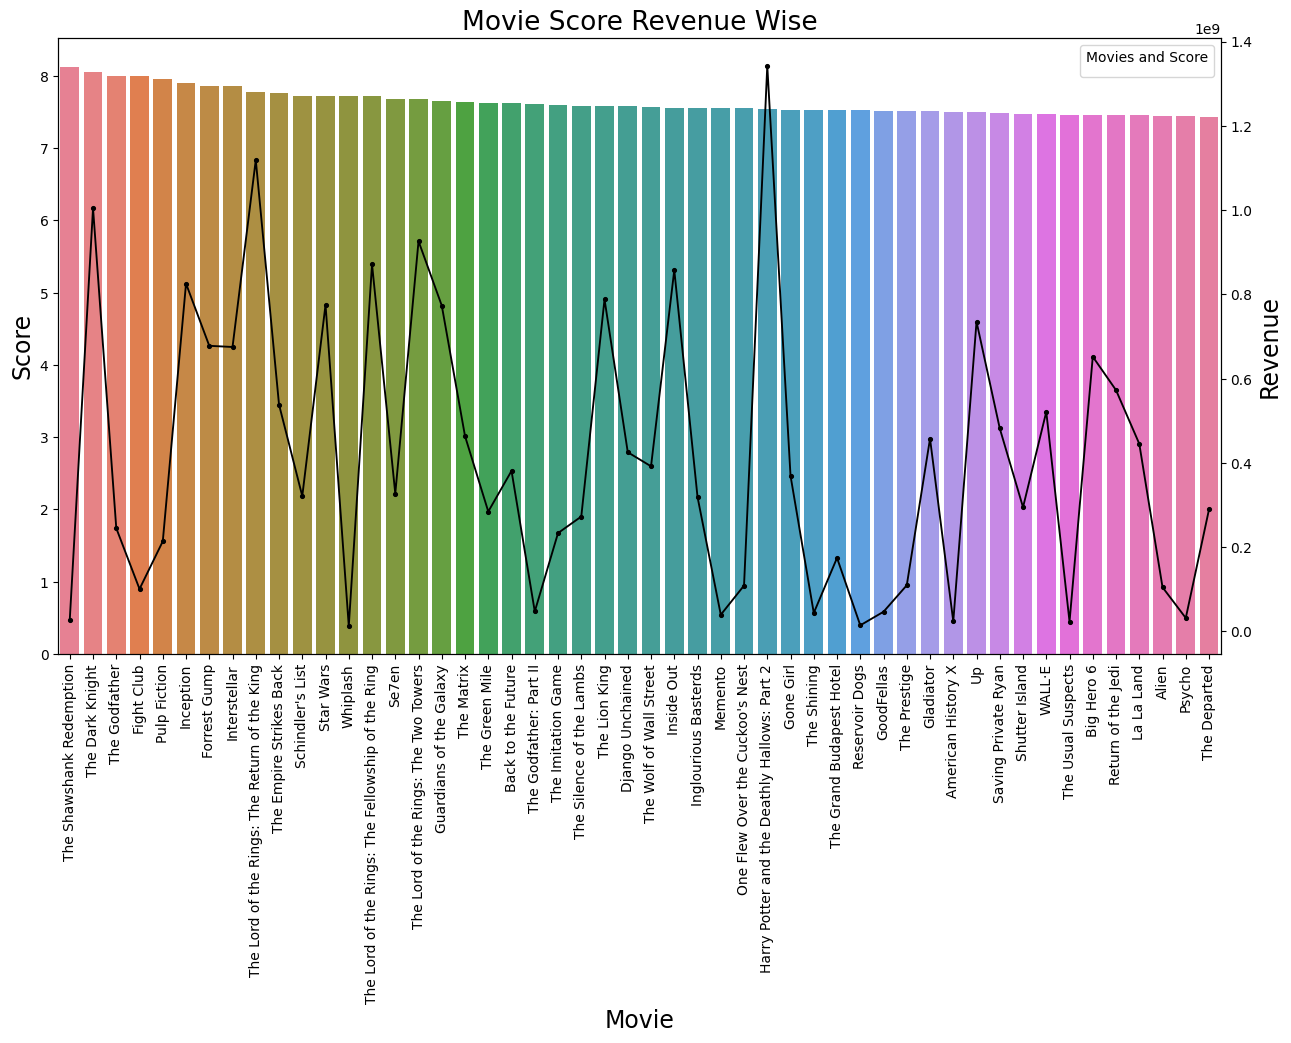

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['revenue'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("Revenue", fontsize=17)
g1.set_title("Movie Score Revenue Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\520007549.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\520007549.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)


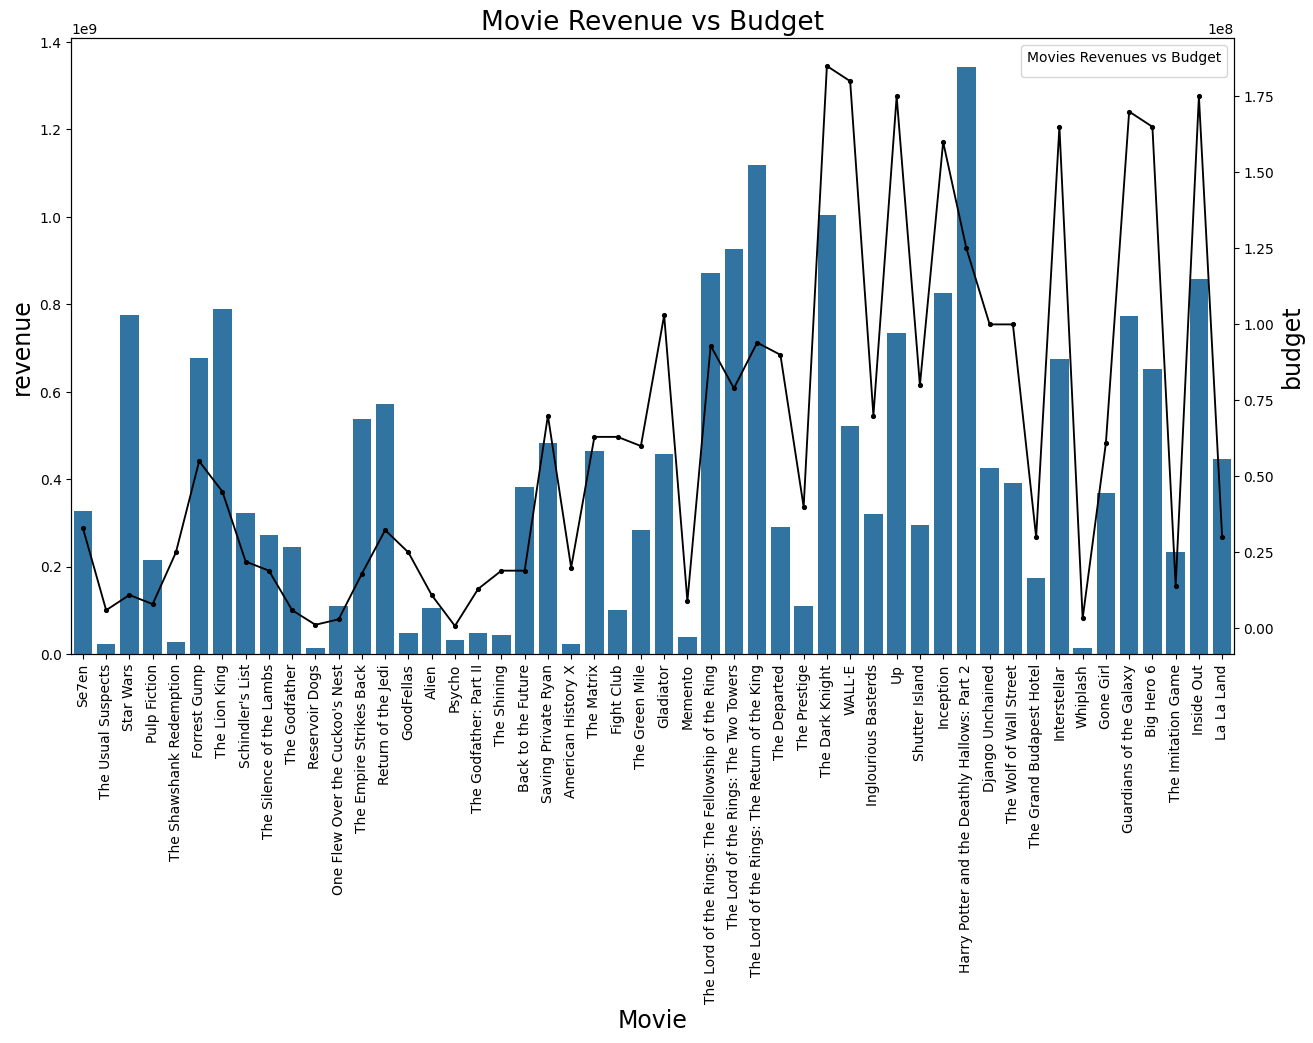

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y=q_movies['revenue'].astype(float),  data=q_movies.head(50))
plt.legend(title='Movies Revenues vs Budget', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("budget", fontsize=17)
g1.set_title("Movie Revenue vs Budget", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("revenue", fontsize=17)
plt.show()

## NUBES DE PALABRAS

### En base a la descripción de cada película

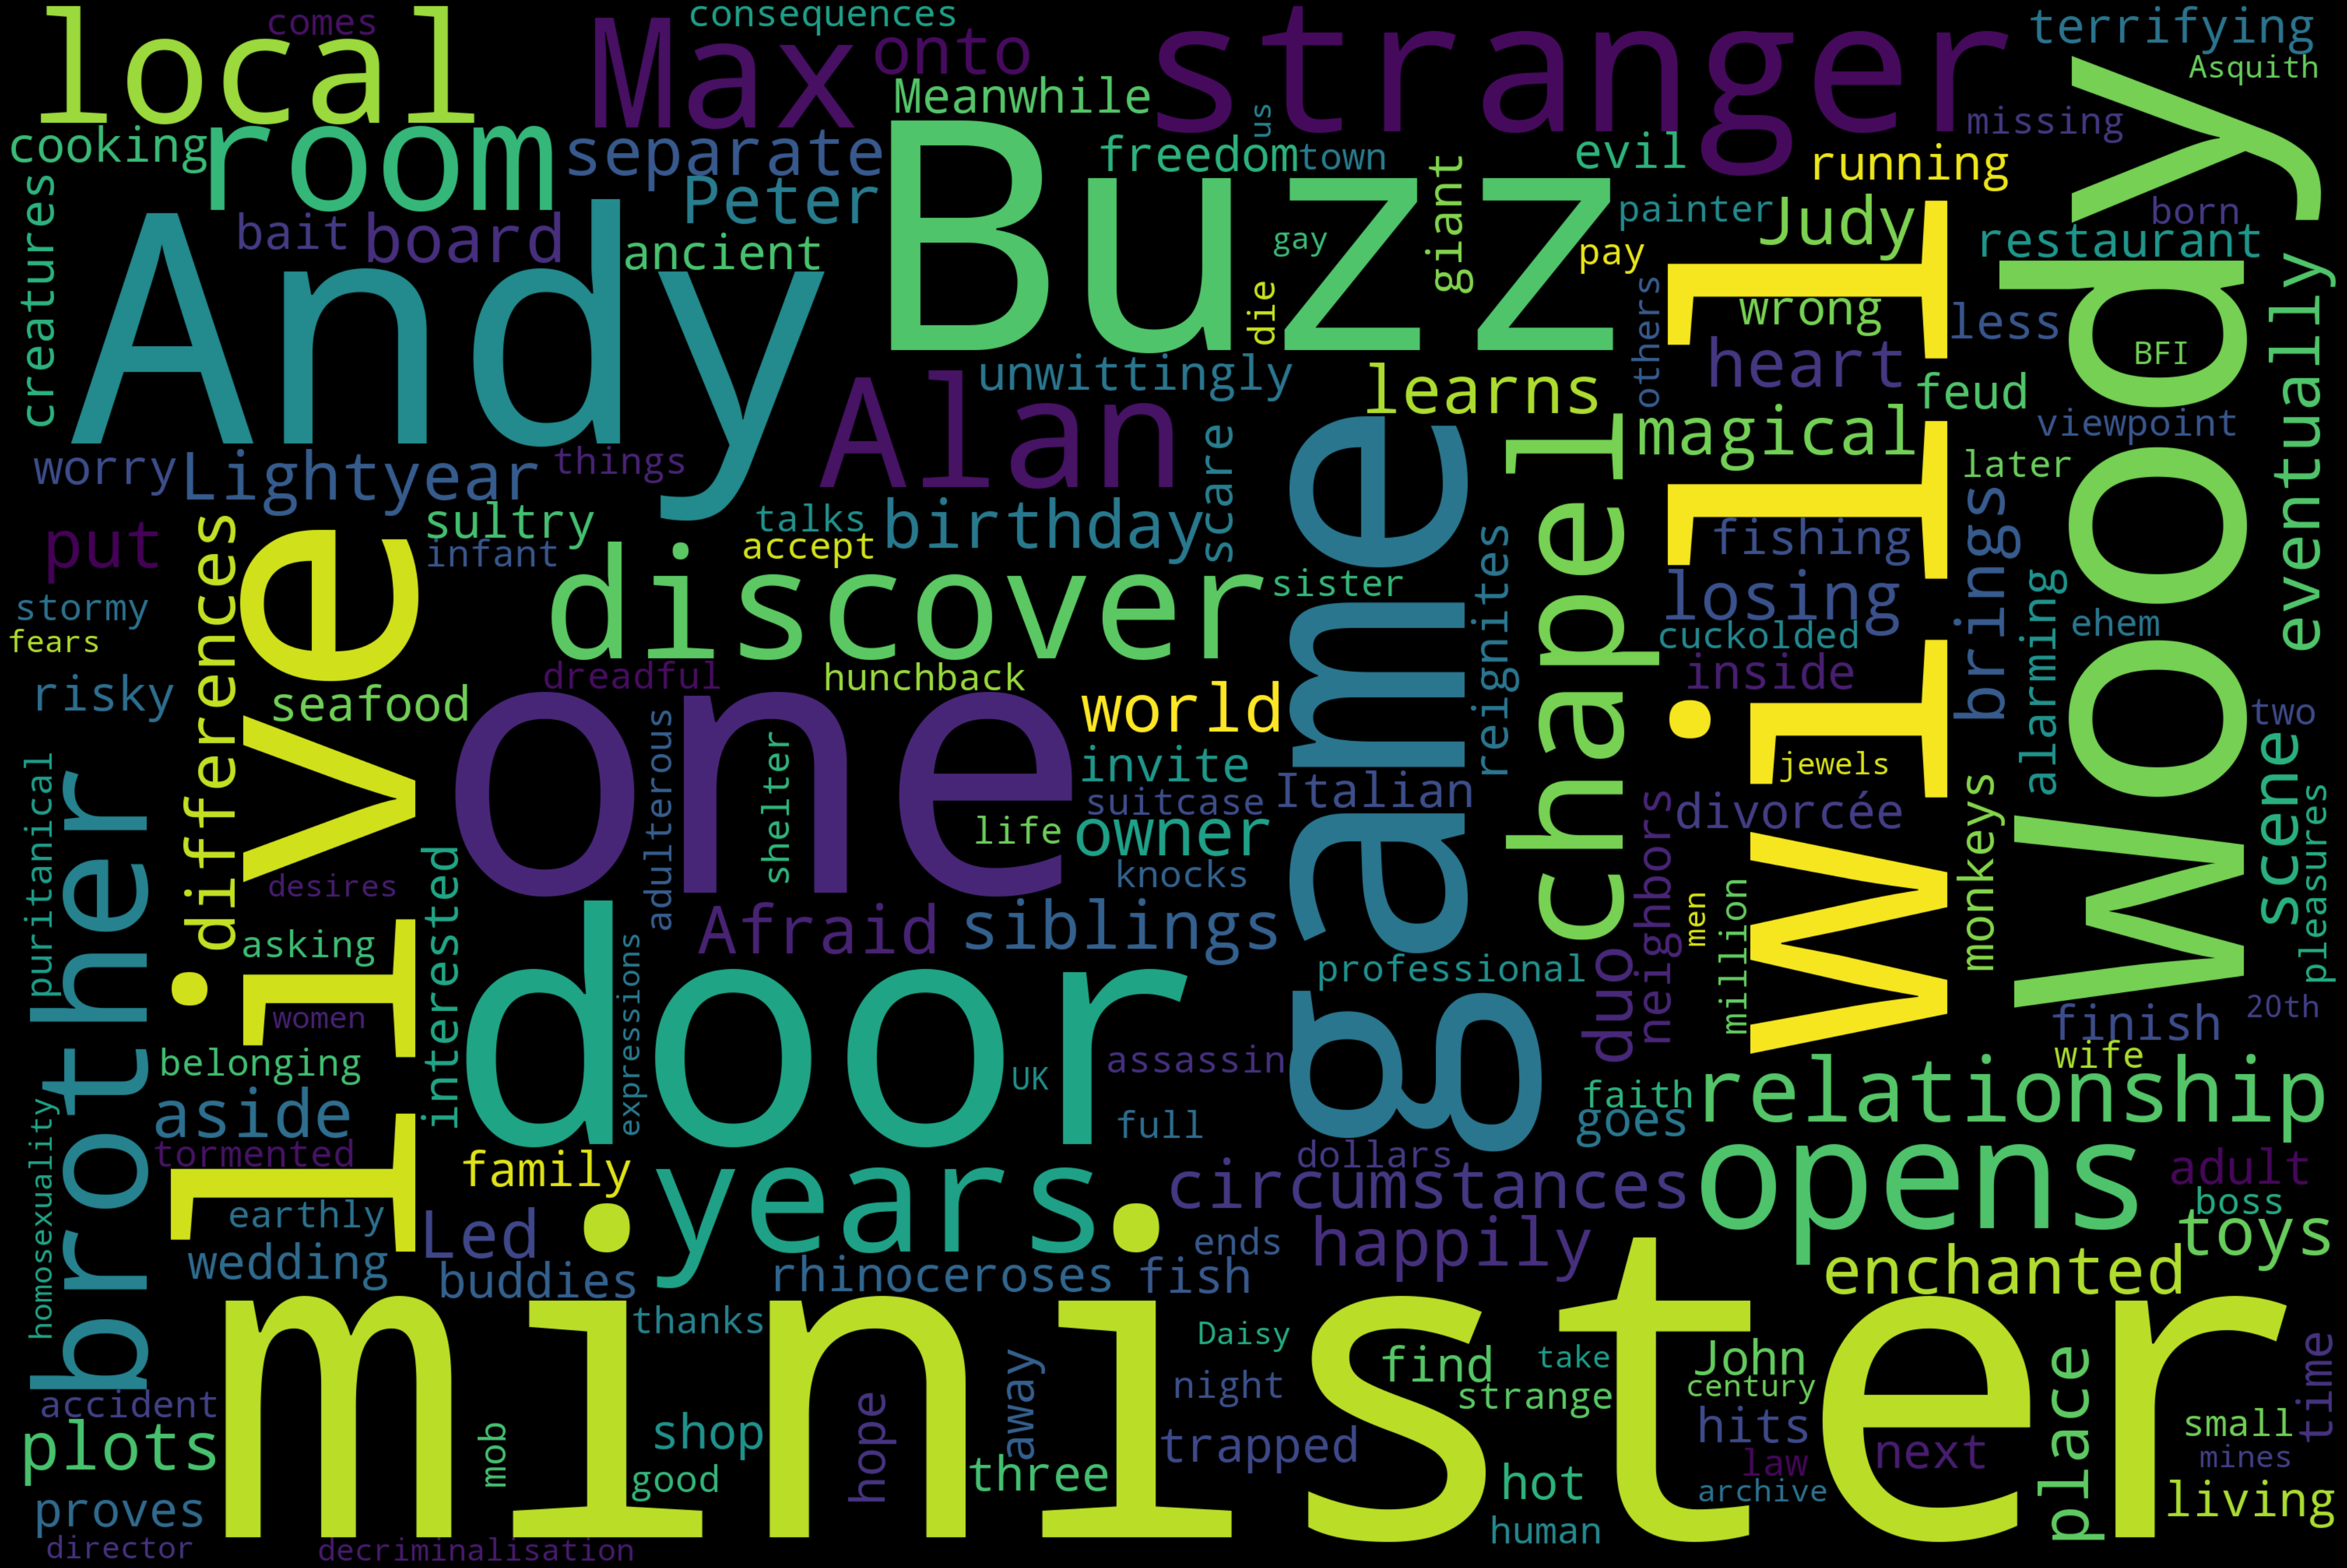

In [49]:
text = df.overview.values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [50]:
df['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
32932    It's the year 3000 AD. The world's most danger...
32933    Yet another version of the classic epic, with ...
32934    When one of her hits goes wrong, a professiona...
32935    In a small town live two brothers, one a minis...
32936    50 years after decriminalisation of homosexual...
Name: overview, Length: 32604, dtype: object

### En base al género de la película

In [51]:
# Abstraemos la columna de generos a la variable 'genres'
genres = df["genres"].apply(ast.literal_eval)

In [54]:
# Convertimos cada dato de 'genres' en una lista de diccionarios
genres_ls = [dic["name"].capitalize() for ls in genres for dic in ls]

In [56]:
# Creamos una variable de texto a partir de la lista de generos
genres_txt = ' '.join(genres_ls)

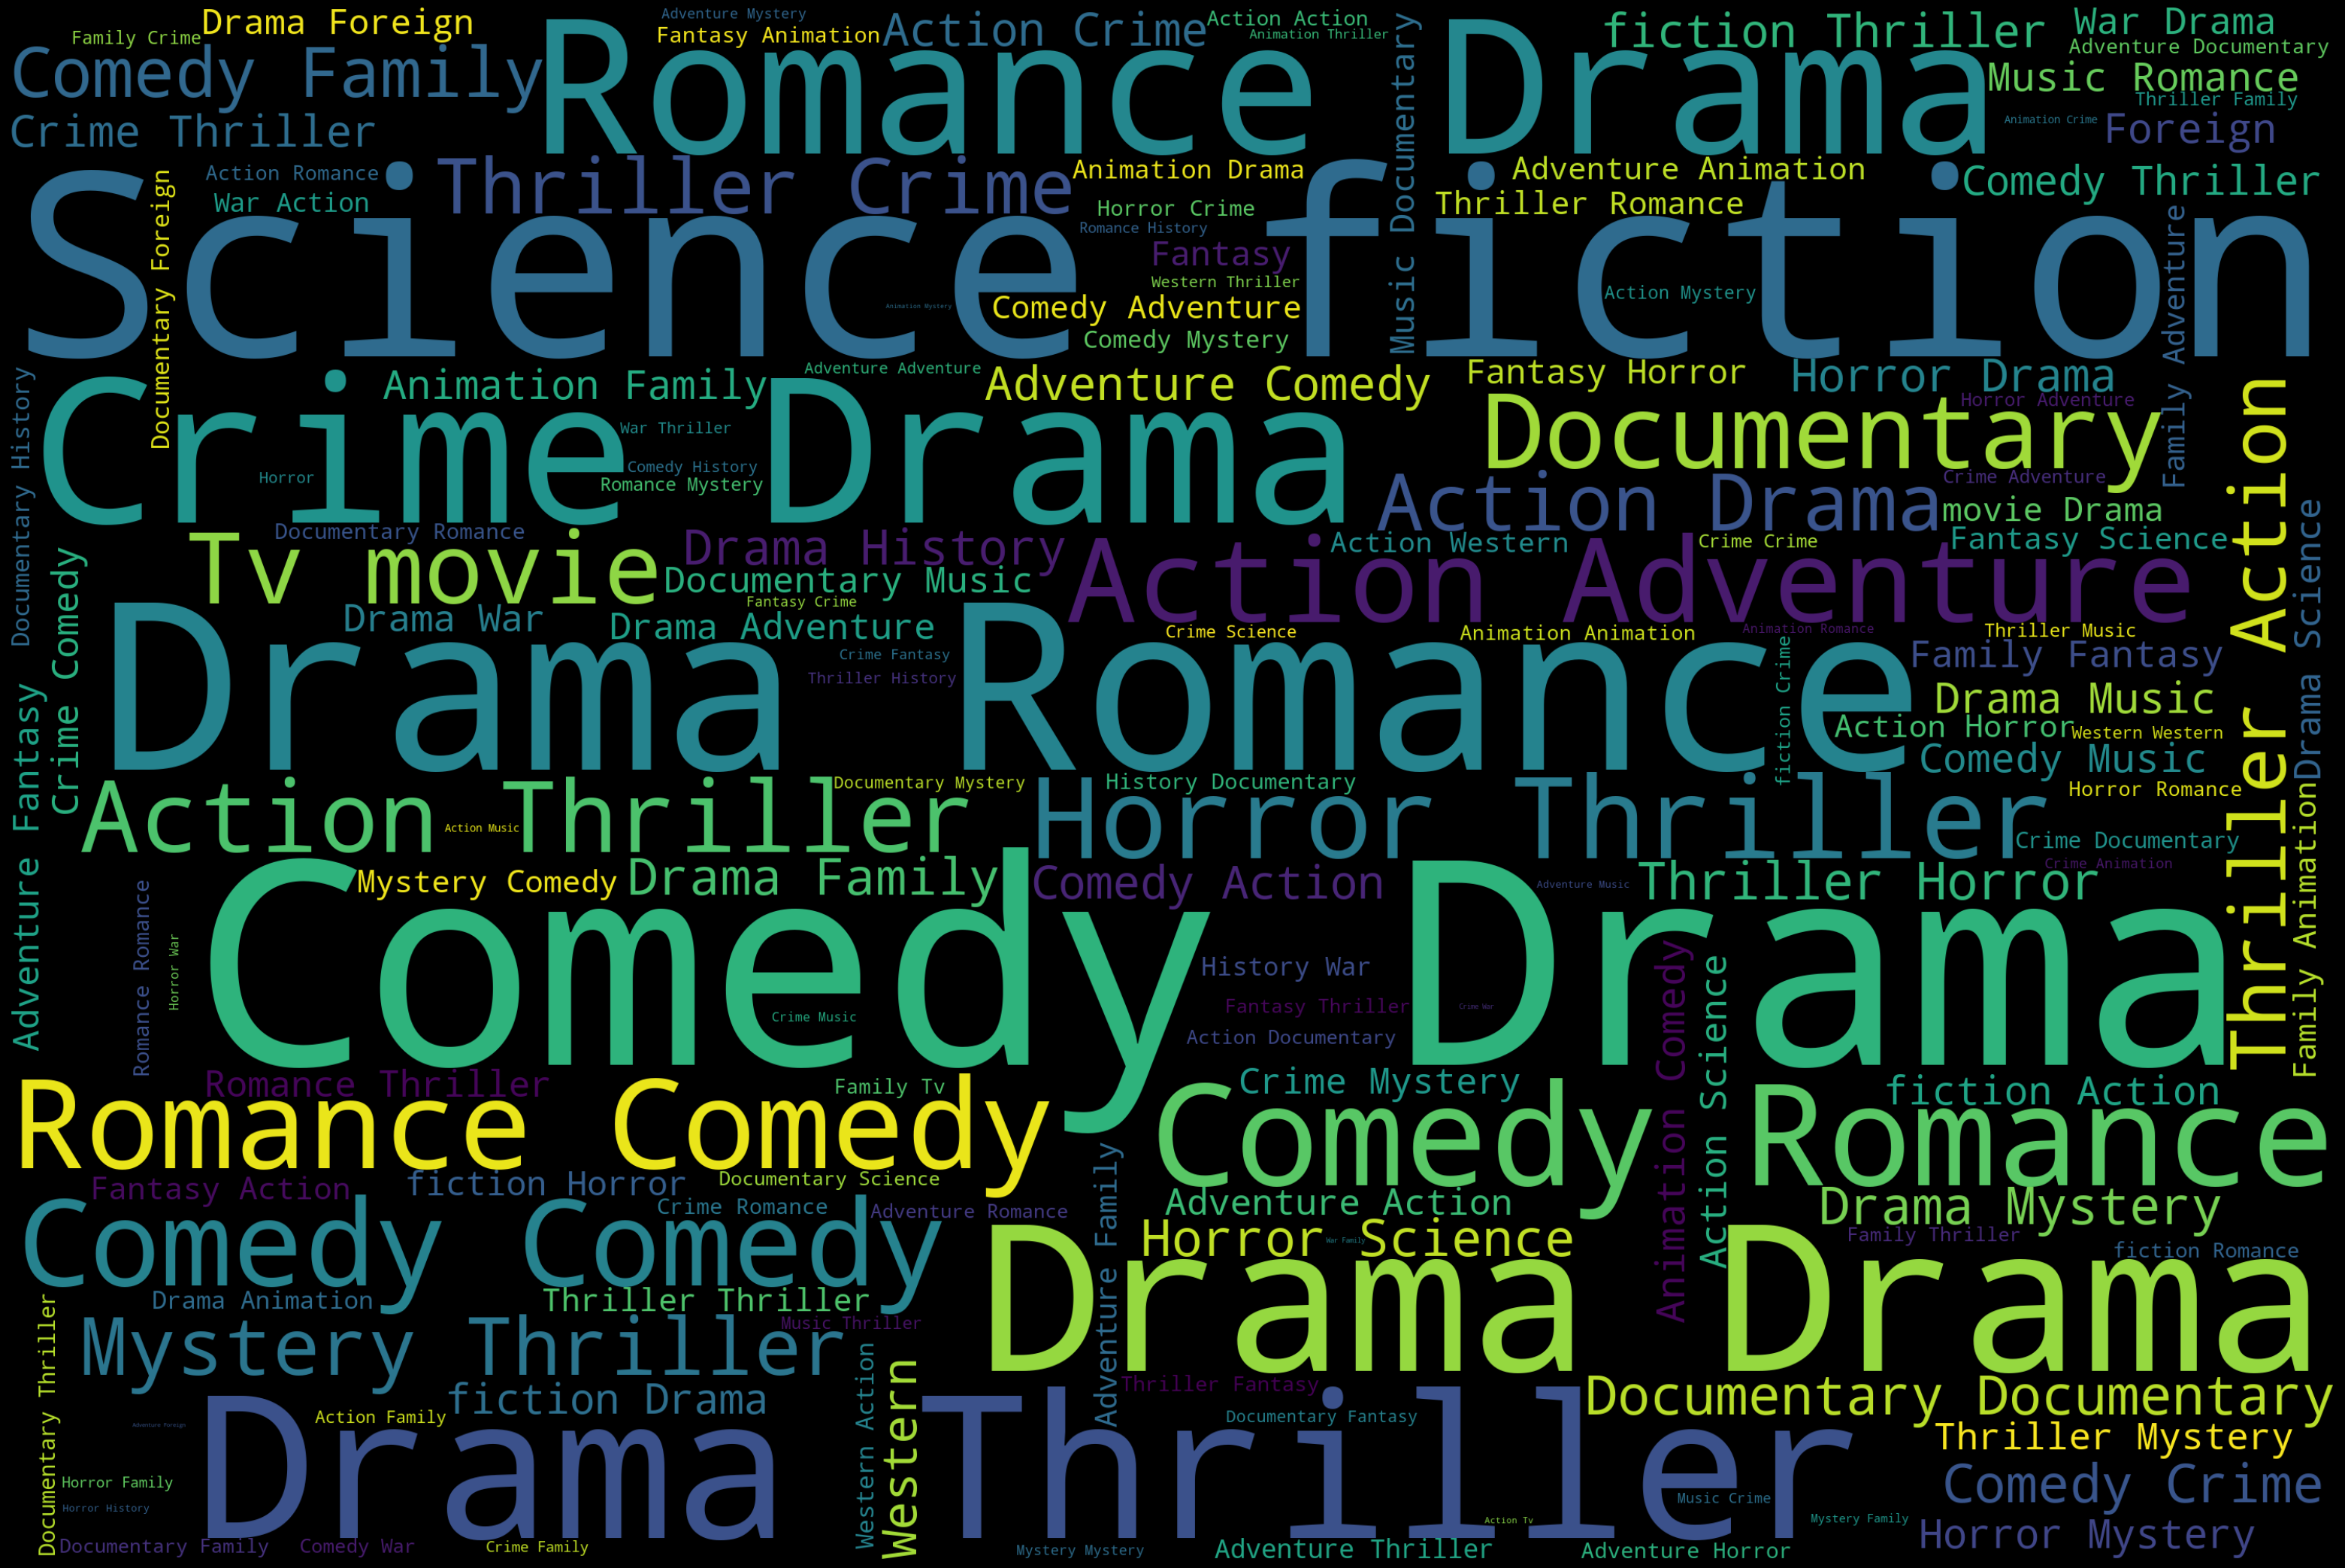

In [62]:
wordcloud = WordCloud(width=3000, height=2000, background_color='black').generate(genres_txt)

# Muestra la nube de palabras
plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
# Mostramos la cantidad de generos que más aparecen en la colección de datos
max_length = max(len(gnr) for gnr in set(genres_ls))

for gnr in sorted(set(genres_ls), key=lambda x: genres_ls.count(x), reverse=True):
    print(f'{gnr: <{max_length}} : {genres_ls.count(gnr)}')

Drama           : 13488
Comedy          : 9428
Thriller        : 6069
Romance         : 4898
Action          : 4807
Horror          : 3860
Documentary     : 3409
Crime           : 3195
Adventure       : 2736
Science fiction : 2514
Family          : 2309
Mystery         : 1947
Fantasy         : 1617
Music           : 1414
Animation       : 1269
War             : 901
History         : 893
Western         : 850
Tv movie        : 732
Foreign         : 716
